Weight ratio for Dimension 1: 2.1110172271728516
Weight ratio for Dimension 2: 1.0552940368652344


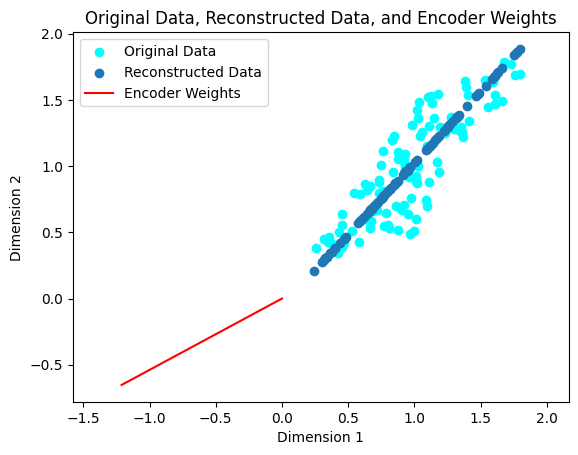

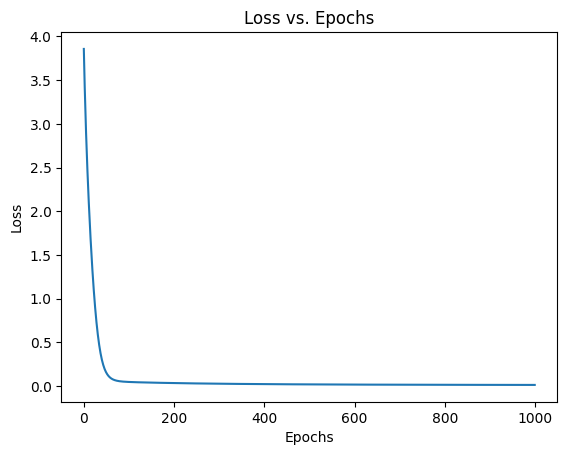

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to define the linear encoder
def encoder(x, wEncoder, bEncoder):
    z = torch.matmul(x, wEncoder) + bEncoder
    return z

# Function to define the linear decoder
def decoder(z, wDecoder, bDecoder):
    x_reconstruction = torch.matmul(z, wDecoder) + bDecoder
    return x_reconstruction

# Function to calculate Mean Squared Error (MSE) loss
def mse_loss(x, x_reconstruction):
    loss = torch.mean((x - x_reconstruction) ** 2)
    return loss

# Generate random data
D = 2
x = torch.rand(100, D)
x[:, 0] = x[:, 0] + x[:, 1]
x[:, 1] = 0.5 * x[:, 0] + x[:, 1]

# Initialize encoder and decoder parameters
wEncoder = torch.randn(D, 1, requires_grad=True)
wDecoder = torch.randn(1, D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1, D, requires_grad=True)

# Set optimization parameters
learning_rate = 0.01
momentum = 0.0  # Change this for different experiments
optimizer = torch.optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=learning_rate, momentum=momentum)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    z = encoder(x, wEncoder, bEncoder)
    x_reconstruction = decoder(z, wDecoder, bDecoder)
    loss = mse_loss(x, x_reconstruction)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print weight ratios
weight_ratio_dimension_1 = (wEncoder[0, 0] / wDecoder[0, 0]).detach().numpy()
weight_ratio_dimension_2 = (wEncoder[1, 0] / wDecoder[0, 1]).detach().numpy()

print(f'Weight ratio for Dimension 1: {weight_ratio_dimension_1}')
print(f'Weight ratio for Dimension 2: {weight_ratio_dimension_2}')

# Plot original data, reconstructed data, and encoder weights
plt.scatter(x[:, 0], x[:, 1], color='cyan', label='Original Data')
plt.scatter(x_reconstruction.detach().numpy()[:, 0], x_reconstruction.detach().numpy()[:, 1], label='Reconstructed Data')
plt.plot([0, wEncoder[0, 0].detach().numpy()], [0, wEncoder[1, 0].detach().numpy()], '-r', label='Encoder Weights')
plt.axis('equal')
plt.legend()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Original Data, Reconstructed Data, and Encoder Weights')
plt.show()

# Plot loss versus epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()